In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("data/Instagram_Analytics.csv")

In [25]:
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [26]:
df.columns

Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category'],
      dtype='object')

In [27]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


<Axes: xlabel='content_category'>

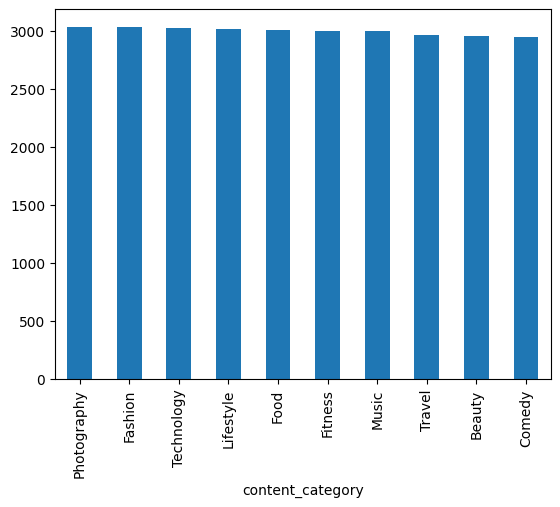

In [28]:
df['content_category'].value_counts().plot(kind='bar')



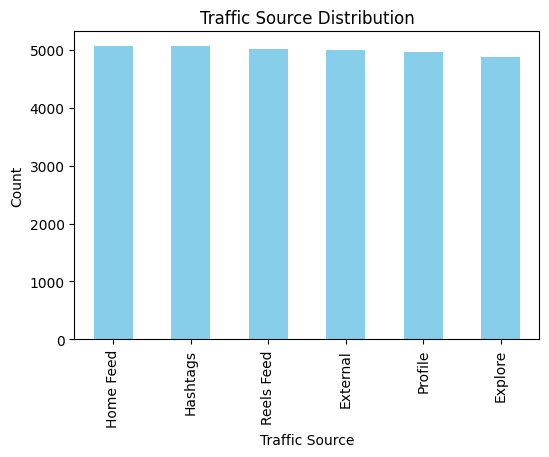

In [29]:
plt.figure(figsize=(6,4))
df['traffic_source'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Traffic Source Distribution")
plt.xlabel("Traffic Source")
plt.ylabel("Count")
plt.show()


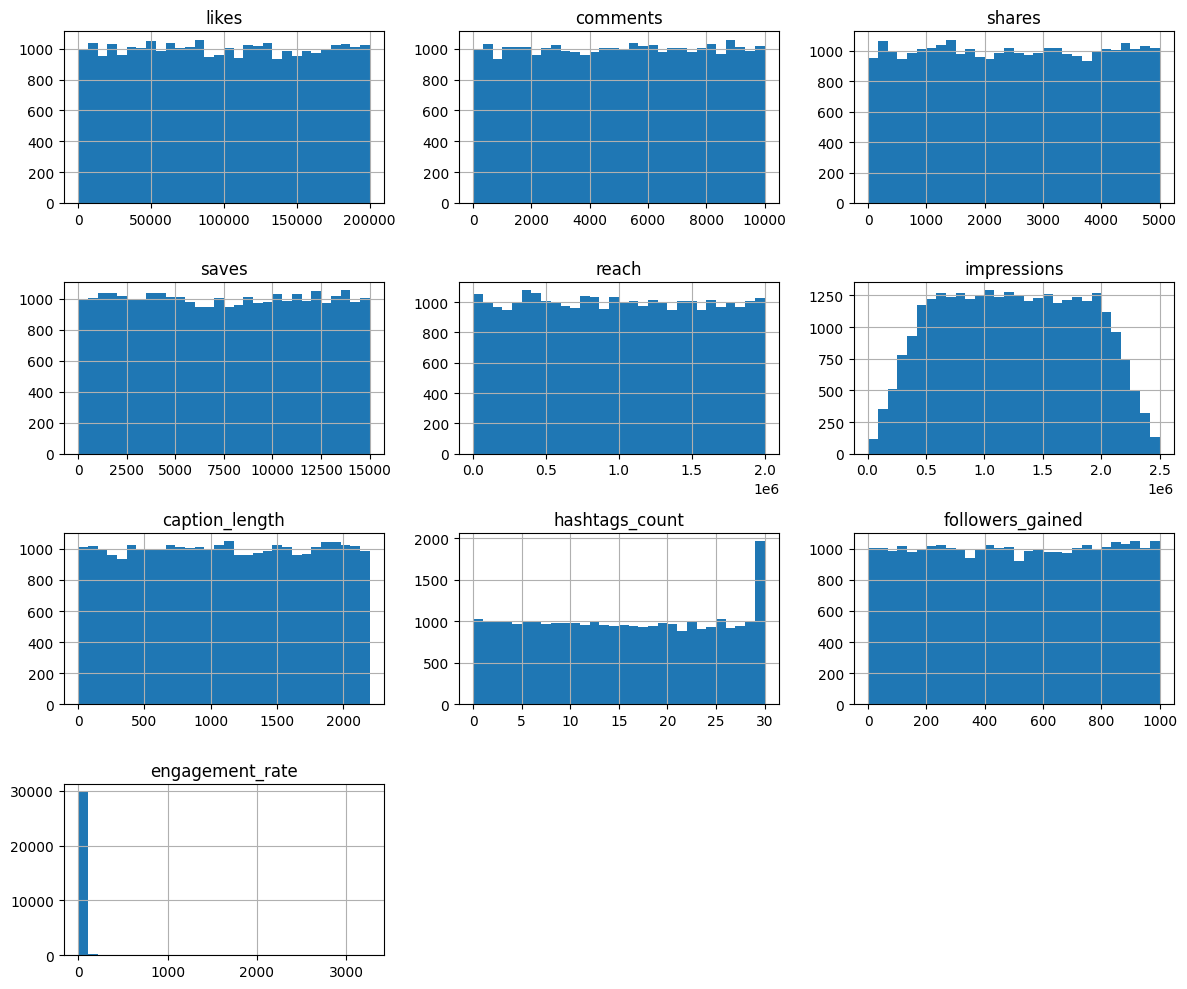

In [30]:
df[['likes','comments','shares','saves','reach','impressions',
    'caption_length','hashtags_count','followers_gained','engagement_rate']].hist(
    figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()


In [31]:
df['upload_date'] = pd.to_datetime(df['upload_date'])

df['year'] = df['upload_date'].dt.year
df['month'] = df['upload_date'].dt.month
df['day'] = df['upload_date'].dt.day
df['weekday'] = df['upload_date'].dt.weekday
df['hour'] = df['upload_date'].dt.hour


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['media_type'] = le.fit_transform(df['media_type'])
df['traffic_source'] = le.fit_transform(df['traffic_source'])
df['content_category'] = le.fit_transform(df['content_category'])


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# plotting defaults
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# -----------------------------
# 0. Preprocess / sanity checks
# -----------------------------
# Ensure datetime and derived time features
if not np.issubdtype(df['upload_date'].dtype, np.datetime64):
    df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce')

# If any parse failed, drop those rows (shouldn't happen given your earlier info)
df = df.dropna(subset=['upload_date']).copy()

df['hour'] = df['upload_date'].dt.hour
df['weekday'] = df['upload_date'].dt.weekday  # Monday=0 ... Sunday=6

# Keep a copy with original categorical labels for plots
_plotdf = df.copy()

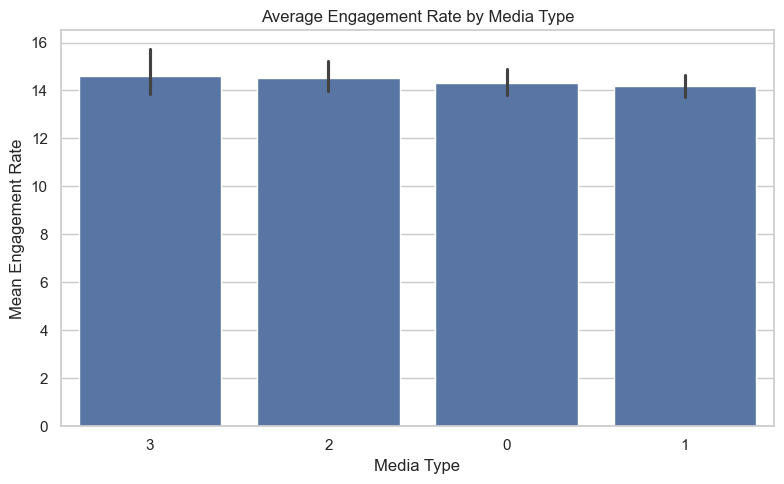

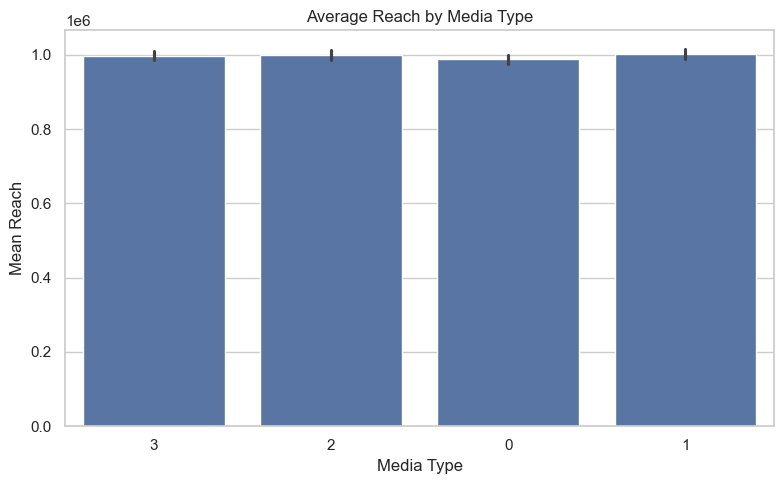

In [34]:
# 1. Media type performance
# -----------------------------
plt.figure(figsize=(8,5))
media_order = _plotdf.groupby('media_type')['engagement_rate'].mean().sort_values(ascending=False).index
sns.barplot(data=_plotdf, x='media_type', y='engagement_rate', order=media_order)
plt.title('Average Engagement Rate by Media Type')
plt.ylabel('Mean Engagement Rate')
plt.xlabel('Media Type')
plt.tight_layout()
plt.show()

# Also show reach and impressions per media type
plt.figure(figsize=(8,5))
sns.barplot(data=_plotdf, x='media_type', y='reach', order=media_order)
plt.title('Average Reach by Media Type')
plt.ylabel('Mean Reach')
plt.xlabel('Media Type')
plt.tight_layout()
plt.show()
